In [23]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [2]:
data_dir = '/AIWorkplace/MLCB/kmeans/data' # path to your data folder
mnist = fetch_openml('mnist_784', data_home=data_dir)
print('shape of minst data:', mnist.data.shape)

shape of minst data: (70000, 784)


In [18]:
type(mnist.data)

pandas.core.frame.DataFrame

In [19]:
mnist_data = np.array(mnist.data)
type(mnist_data)

numpy.ndarray

In [20]:
K = 10          # number of clusters 
N = 10000       # number of samples 
X = mnist_data[np.random.choice(mnist.data.shape[0], N)]

In [26]:
from display_network import *

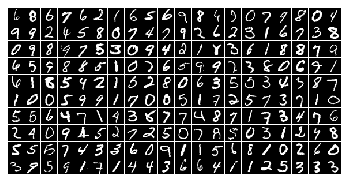

In [28]:
N = 200
X = mnist_data[np.random.choice(mnist.data.shape[0], N)]/255
plt.axis('off')
A = display_network(X.T, 10, 20)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.savefig('mnist_ex.png', bbox_inches='tight', dpi = 400)
plt.show()

In [29]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

In [30]:
K = 10
N = 10000
X =mnist_data[np.random.choice(mnist.data.shape[0], N)]
kmeans = KMeans(n_clusters=K).fit(X)
pred_label = kmeans.predict(X)

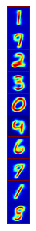

In [31]:
plt.axis('off')
A = display_network(kmeans.cluster_centers_.T, 10, 1)
f2 = plt.imshow(A, interpolation='nearest',cmap = plt.cm.jet )

plt.savefig('mnist_centroids.png', bbox_inches='tight', dpi = 600)
plt.show()

In [78]:
N0 = 10
K = 10
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
    Xk = X[pred_label == k, :]
    
    # random points in each cluster 
    X1[N0*k: N0*k + N0,:] = Xk[:N0, :]
    
    # N0 nearest points 
    centroid_k = kmeans.cluster_centers_[k]
    neigh = NearestNeighbors(n_neighbors=N0) # get 10 nearest neighbors 
    neigh.fit(Xk)
    centroid_k = centroid_k.reshape(1, -1)
    X2[N0*k: N0*k + N0,:] = Xk[np.array(neigh.kneighbors(centroid_k, n_neighbors=N0))[1][0].astype(int), :]

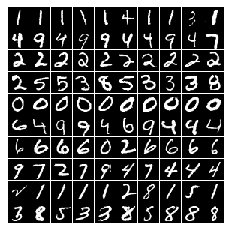

In [79]:
# random points in cluster 
plt.axis('off')
A = display_network(X1.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.savefig('mnist_cluster_random.png', bbox_inches='tight', dpi = 600)
plt.show()

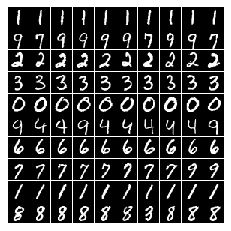

In [80]:
# nearest points 
plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.savefig('mnist_cluster_nn.png', bbox_inches='tight', dpi = 600)
plt.show()